# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow
import tensorflow.keras as tk



## Loading and Spliting the Data into train and test set

In [2]:
(X_train, y_train), (X_test, y_test)= tk.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 37s 8us/step


In [3]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

## Change Dimensions

In [5]:
# 3 dimension image
X_train.ndim 

3

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train  = np.expand_dims(X_train,-1)
X_test  = np.expand_dims(X_test,-1)

In [8]:
# 4 Dimension image
X_train.ndim 

4

In [9]:
X_train.shape

(60000, 28, 28, 1)

## Feature Scaling

In [10]:
X_train = X_train/255
X_test = X_test/255

## Spliting Dataset for validation set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train , y_val = train_test_split(X_train,y_train , test_size = 0.2 , random_state = 2020)

In [12]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [13]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

Convolutional Neural Network(CNN)

For the convolutional front-end, we can start with a Three convolutional layer with a small filter size and a modest number of filters (64) followed by a max pooling layer. The filter maps can then be flattened to provide features to the classifier.

Given that the problem is a multi-class classification, we know that we will require an output layer with 10 nodes in order to predict the probability distribution of an image belonging to each of the 10 classes. This will also require the use of a softmax activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with 128 nodes.

All layers will use the ReLU activation function and the He weight initialization scheme, both best practices.

![screen-shot-2016-08-07-at-9-15-21-pm.png](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-9-15-21-pm.png)

In [14]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1st Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2nd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3rd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Flatten(),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

# Plotting The neural Network Work flow

In [15]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

## Compile and Model Fitting

In [17]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs = 10,batch_size = 512,verbose = 1, validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 26s 263ms/step - loss: 1.2175 - accuracy: 0.5198 - val_loss: 0.6475 - val_accuracy: 0.7421
Epoch 2/10
94/94 [==============================] - 28s 299ms/step - loss: 0.6090 - accuracy: 0.7690 - val_loss: 0.5015 - val_accuracy: 0.8041
Epoch 3/10
94/94 [==============================] - 26s 275ms/step - loss: 0.4954 - accuracy: 0.8161 - val_loss: 0.4349 - val_accuracy: 0.8432
Epoch 4/10
94/94 [==============================] - 26s 273ms/step - loss: 0.4304 - accuracy: 0.8448 - val_loss: 0.3777 - val_accuracy: 0.8617
Epoch 5/10
94/94 [==============================] - 26s 273ms/step - loss: 0.3672 - accuracy: 0.8686 - val_loss: 0.3357 - val_accuracy: 0.8799
Epoch 6/10
94/94 [==============================] - 26s 273ms/step - loss: 0.3361 - accuracy: 0.8817 - val_loss: 0.3299 - val_accuracy: 0.8807
Epoch 7/10
94/94 [==============================] - 26s 273ms/step - loss: 0.3170 - accuracy: 0.8873 - val_loss: 0.3159 - val_accuracy: 0.8842

Text(0.5, 1.0, 'Training and validation loss')

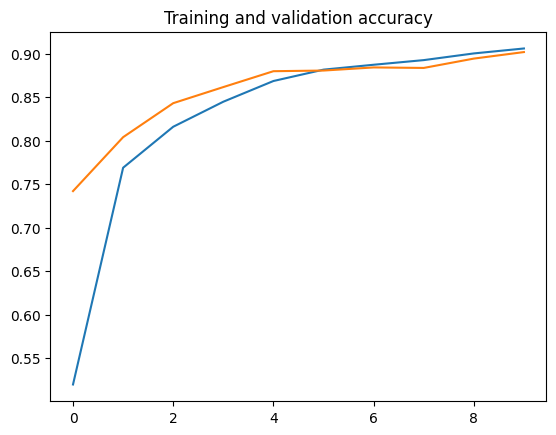

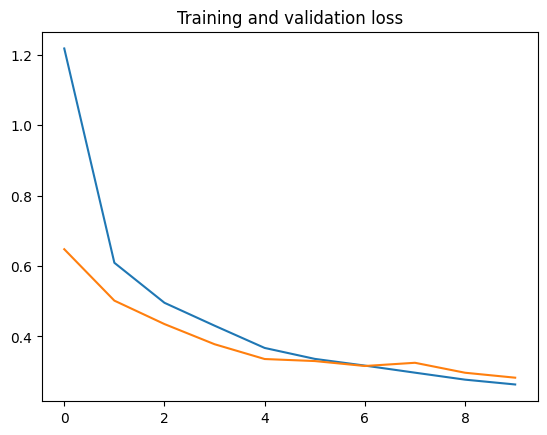

In [19]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history[ 'accuracy' ]
val_acc = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

## Testing the Model

In [20]:
# np.expand is used to change the 3 dimension data into 4 dimension
model.predict(np.expand_dims(X_test[0],axis = 0)).round(2)

1/1 [==============================] - 0s 138ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99]],
      dtype=float32)

In [21]:
y_pred = model.predict(X_test).round(2)
y_pred

313/313 [==============================] - 1s 5ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.09, 0.  , 0.  ]], dtype=float32)

# Evaluation

In [22]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3006 - accuracy: 0.8960


[0.3006438612937927, 0.8960000276565552]

# Confusion Matrix

<Axes: >

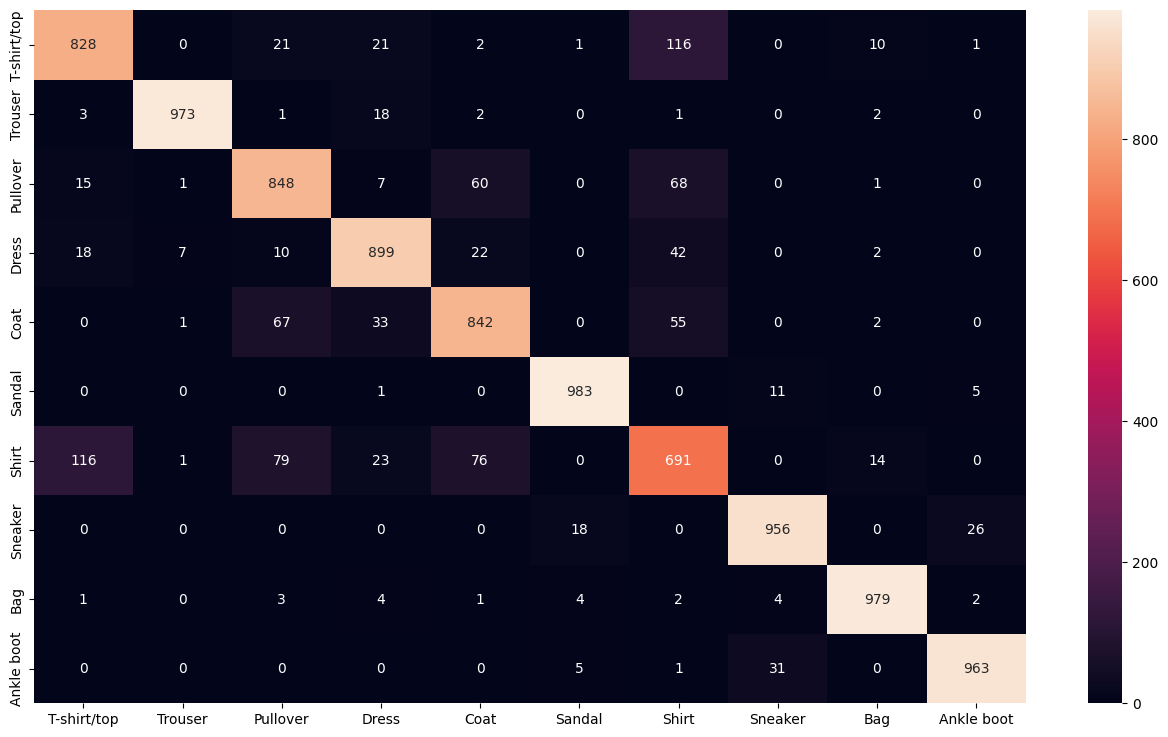

In [23]:
from sklearn.metrics import confusion_matrix
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)